In [1]:
import scanpy as sc

In [23]:
adata = sc.read_h5ad("/home/icb/dominik.klein/git_repos/ot_pert_new/notebooks/prepare_data/data/sciplex3.h5ad")

In [24]:
amplification_genes = ["AKT2", "KMT2B", "CCNE1", "CIC", "POU2F2", "ZNF208", "RHPN2", "CEBPA", "ZNF780A"]

In [25]:
adata

AnnData object with n_obs × n_vars = 581777 × 58347
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1'

In [26]:
adata.obs["target"].cat.categories

Index(['ALK,c-Met', 'AMPK', 'Androgen Receptor', 'Aromatase', 'Aurora Kinase',
       'Aurora Kinase,Bcr-Abl,FLT3', 'Aurora Kinase,Bcr-Abl,JAK',
       'Aurora Kinase,Bcr-Abl,c-RET,FGFR', 'Aurora Kinase,CDK',
       'Aurora Kinase,FLT3,VEGFR', 'Aurora Kinase,VEGFR', 'Autophagy,ROCK',
       'Autophagy,Sirtuin', 'Bcl-2', 'Bcr-Abl', 'Bcr-Abl,c-Kit,Src',
       'Beta Amyloid,Gamma-secretase', 'CCR', 'CDK', 'COX',
       'CSF-1R,PDGFR,VEGFR', 'DNA Methyltransferase', 'DNA alkylator',
       'DNA/RNA Synthesis', 'Dehydrogenase', 'Dopamine Receptor',
       'E3 Ligase ,TNF-alpha', 'E3 Ligase ,p53', 'EGFR', 'EGFR,HDAC,HER2',
       'EGFR,HER2', 'EGFR,JAK', 'Epigenetic Reader Domain',
       'Estrogen/progestogen Receptor', 'FAAH', 'FAK', 'FGFR,PDGFR,VEGFR',
       'FGFR,VEGFR', 'GABA Receptor,HDAC,Autophagy', 'Glucocorticoid Receptor',
       'Glucocorticoid Receptor,Immunology & Inflammation related', 'HDAC',
       'HDAC,PI3K', 'HIF', 'HSP (e.g. HSP90)', 'Histamine Receptor',
       'Histon

In [27]:
adata = adata[adata.obs["target"].isin(("HDAC", "Vehicle"))]
adata = adata[adata.obs["cell_type"]=="A549"]

In [28]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [29]:
%matplotlib inline

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'.

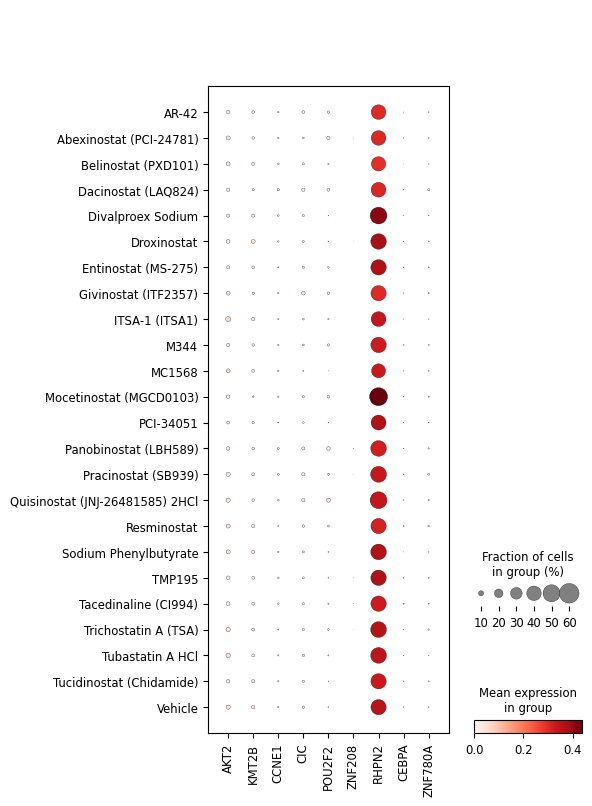

In [30]:
sc.pl.dotplot(adata, var_names = amplification_genes, groupby=["product_name"])

In [31]:
adata.obs["dose"] = adata.obs["dose"].astype("category")

/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'.

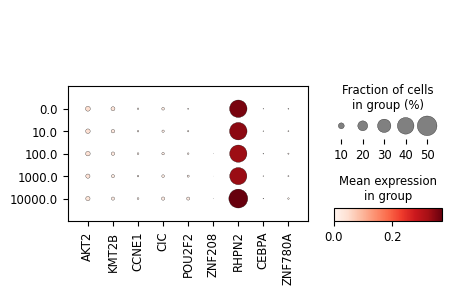

In [32]:
sc.pl.dotplot(adata, var_names = amplification_genes, groupby=["dose"])

In [19]:
adata.obs["dose"] = adata.obs["dose"].astype("category")

In [33]:
adata.obs["dose"]

index
A01_E09_RT_BC_101_Lig_BC_109-0-0       0.0
A01_E09_RT_BC_101_Lig_BC_280-0-0    1000.0
A01_E09_RT_BC_102_Lig_BC_215-0-0    1000.0
A01_E09_RT_BC_104_Lig_BC_382-0-0    1000.0
A01_E09_RT_BC_108_Lig_BC_256-0-0      10.0
                                     ...  
H12_F10_RT_BC_81_Lig_BC_110-0-0      100.0
H12_F10_RT_BC_86_Lig_BC_255-0-0       10.0
H12_F10_RT_BC_87_Lig_BC_316-0-0        0.0
H12_F10_RT_BC_90_Lig_BC_378-0-0     1000.0
H12_F10_RT_BC_9_Lig_BC_160-0-0      1000.0
Name: dose, Length: 19212, dtype: category
Categories (5, float64): [0.0, 10.0, 100.0, 1000.0, 10000.0]